## Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [3]:
df = pd.read_csv('../assets/datas/data.csv')

## Overview of the Data

In [4]:
print("Data Overview: ")
print(df.head())

print(f"Number of rows: {df.shape[0]}")

print(f"Number of columns: {df.shape[1]}")

print("Data Types: ")
print(df.dtypes)

Data Overview: 
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  

## Summary Statistics

* Numerical features

In [5]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

* Calculate summary statistics

In [6]:
summary_stats = df[numerical_features].describe().T
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats['skewness'] = df[numerical_features].skew()
summary_stats['kurtosis'] = df[numerical_features].kurtosis()

print("Summary Statistics for Numerical Features:")
print(summary_stats)


Summary Statistics for Numerical Features:
                   count         mean            std        min    25%  \
CountryCode      95662.0   256.000000       0.000000      256.0  256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0  -50.0   
Value            95662.0  9900.583941  123122.087776        2.0  275.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0    2.0   
FraudResult      95662.0     0.002018       0.044872        0.0    0.0   

                    50%     75%        max       range     IQR   skewness  \
CountryCode       256.0   256.0      256.0         0.0     0.0   0.000000   
Amount           1000.0  2800.0  9880000.0  10880000.0  2850.0  51.098490   
Value            1000.0  5000.0  9880000.0   9879998.0  4725.0  51.291086   
PricingStrategy     2.0     2.0        4.0         4.0     0.0   1.659057   
FraudResult         0.0     0.0        1.0         1.0     0.0  22.196295   

                    kurtosis  
CountryCode       

* Summary statistics for categorical features

In [7]:
categorical_features = df.select_dtypes(include=['object']).columns

print("Summary Statistics for Categorical Features:")
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(df[feature].value_counts())

Summary Statistics for Categorical Features:

Feature: TransactionId
TransactionId
TransactionId_35670     1
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
                       ..
TransactionId_64044     1
TransactionId_98367     1
TransactionId_122975    1
TransactionId_118831    1
TransactionId_86903     1
Name: count, Length: 95662, dtype: int64

Feature: BatchId
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_36631      1
BatchId_126740     1
BatchId_7102       1
BatchId_5198       1
BatchId_134765     1
Name: count, Length: 94809, dtype: int64

Feature: AccountId
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_2728        1
AccountId_3778        1
AccountId_1259        1
AccountId_1948        1
AccountId_918         

## Distribution of Numerical Features

* Plot histograms and KDE plots for each numerical feature


/tmp/ipykernel_91670/2224799049.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)
/tmp/ipykernel_91670/2224799049.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[feature], shade=True)


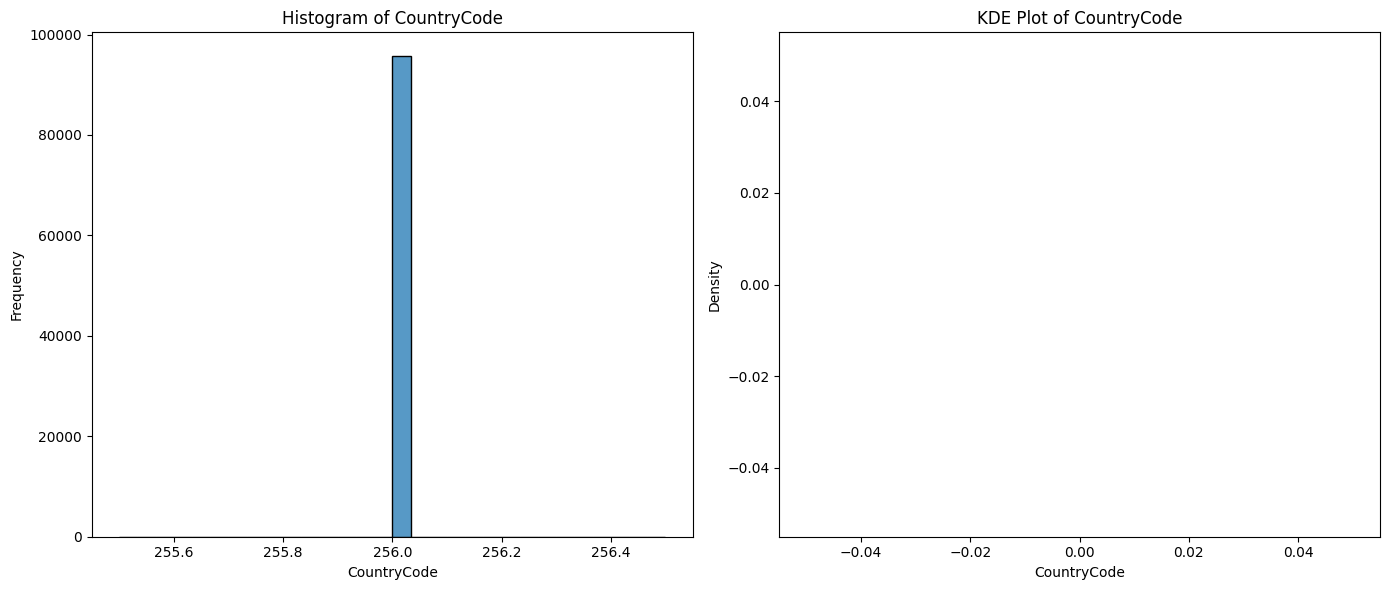

/tmp/ipykernel_91670/2224799049.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


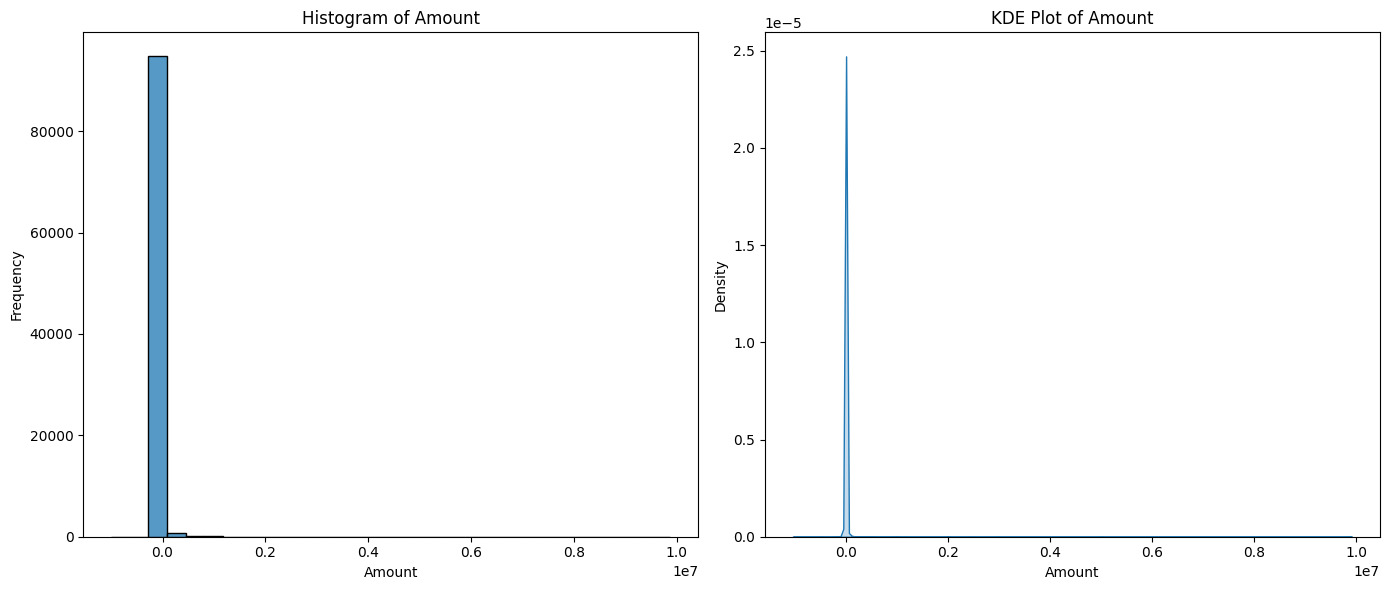

/tmp/ipykernel_91670/2224799049.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


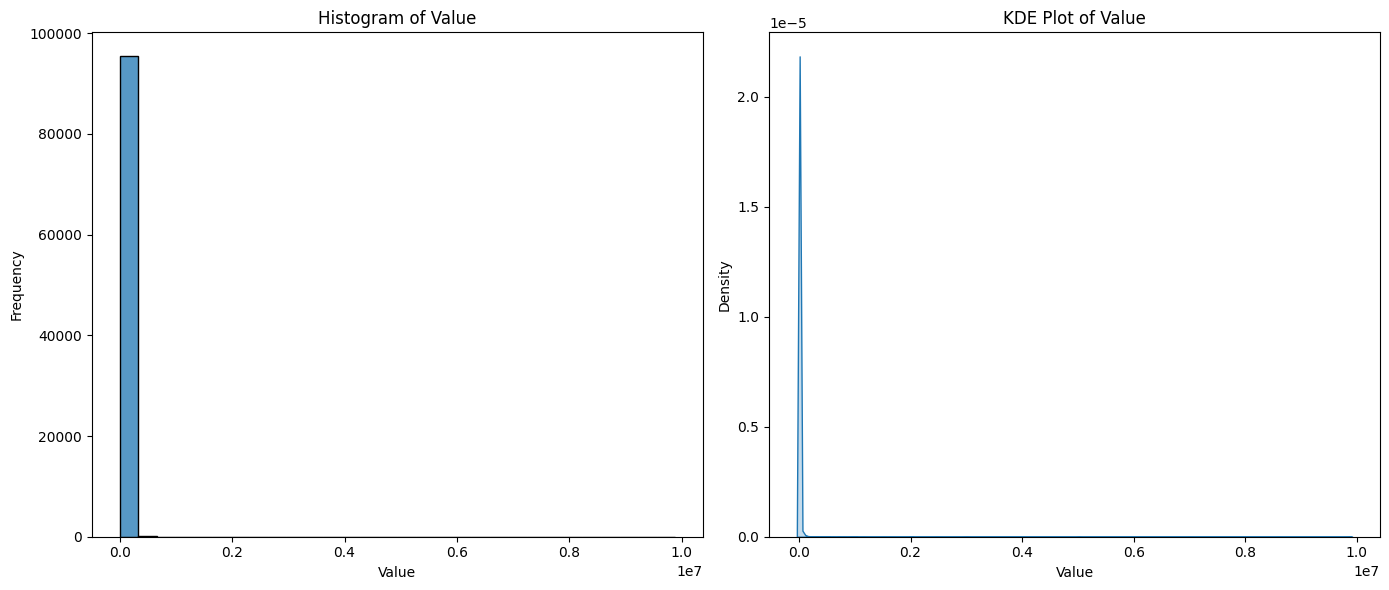

/tmp/ipykernel_91670/2224799049.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


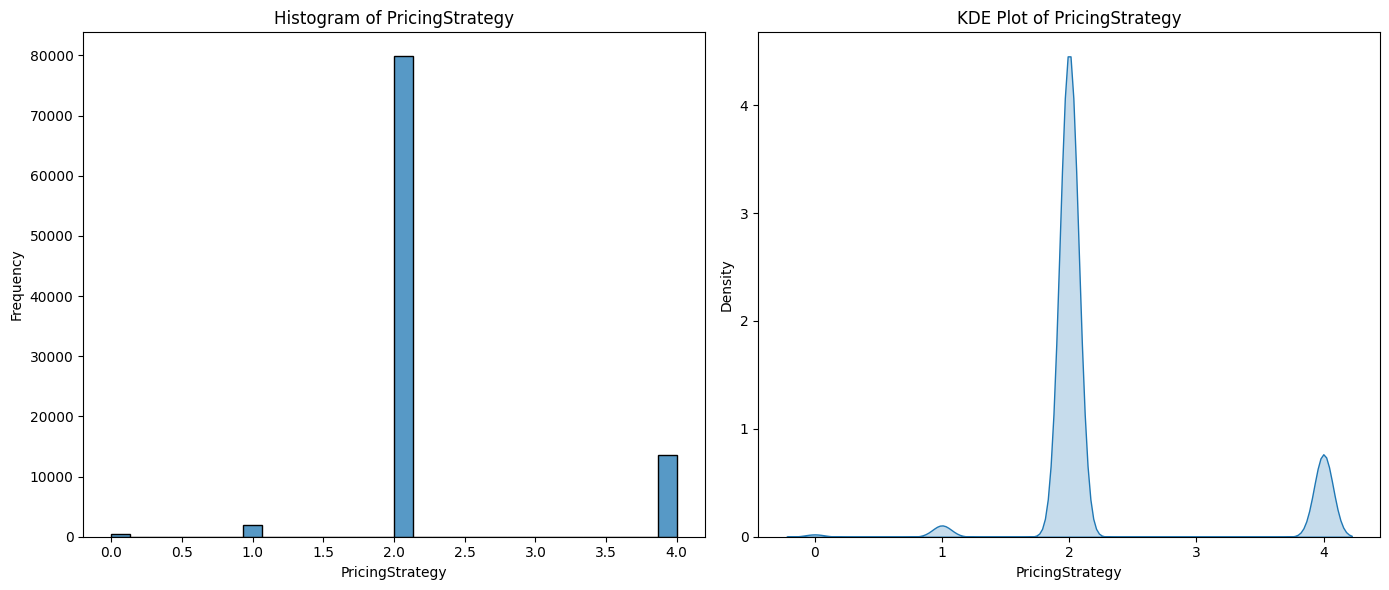

/tmp/ipykernel_91670/2224799049.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


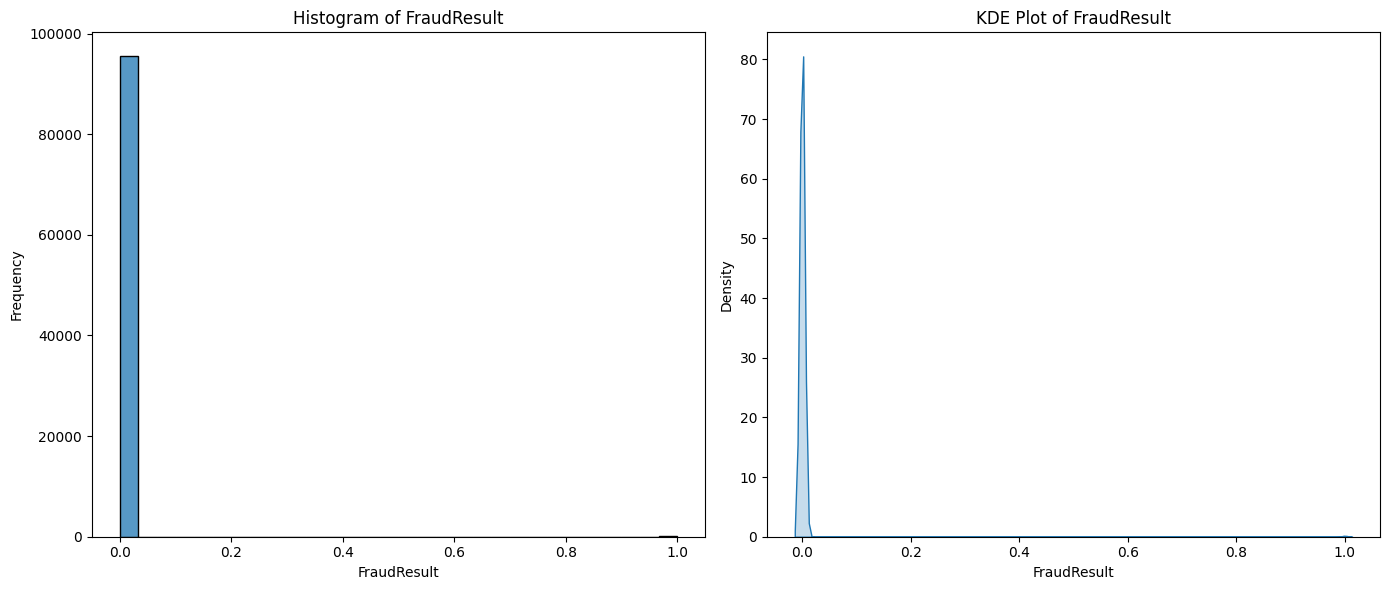

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=False, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()


* Plot box plots for each numerical feature

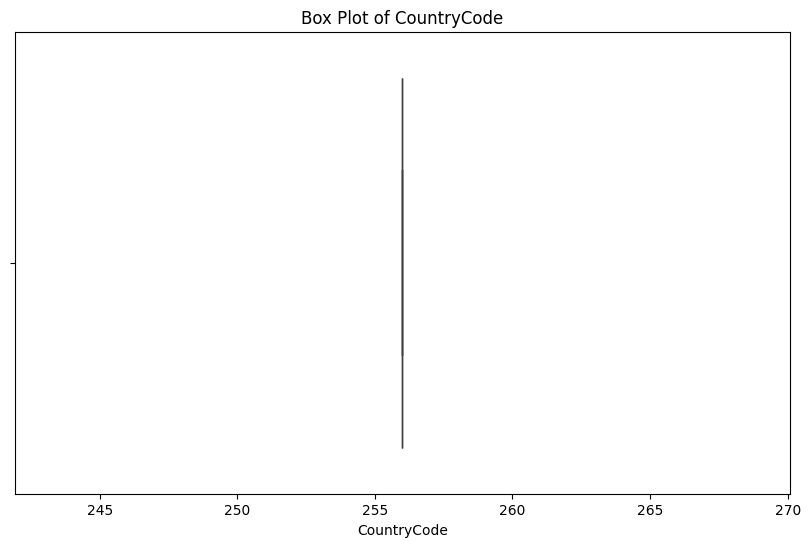

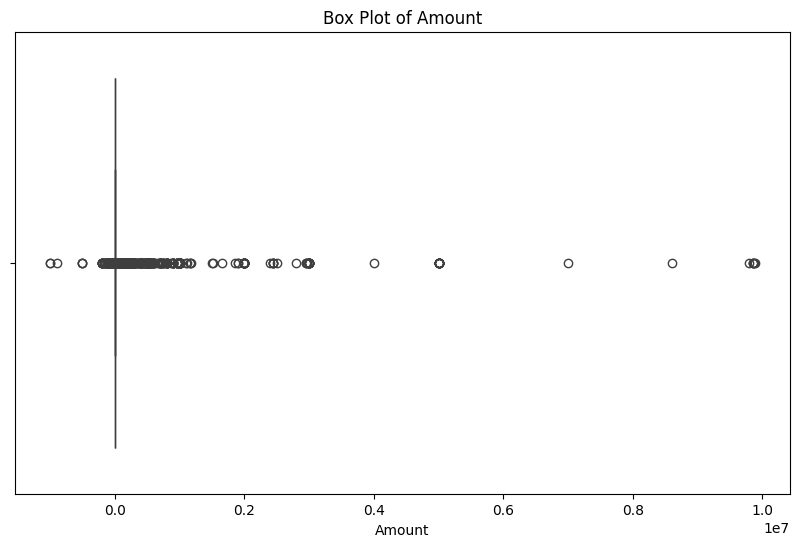

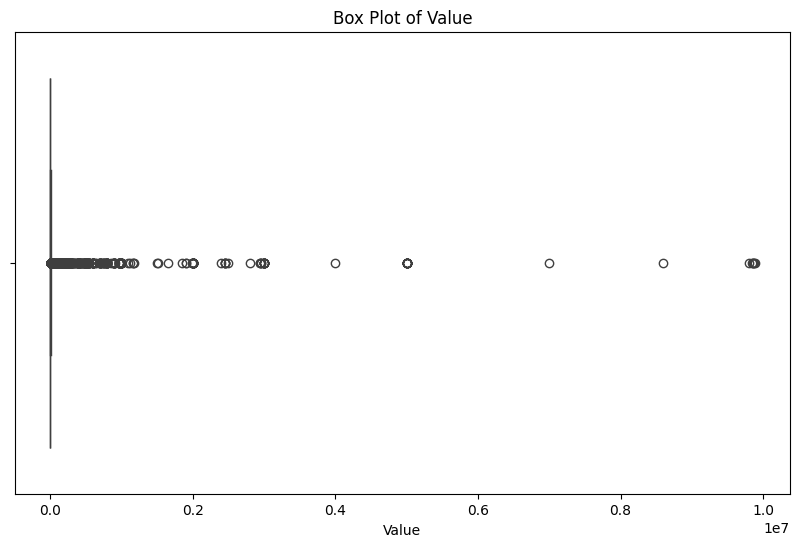

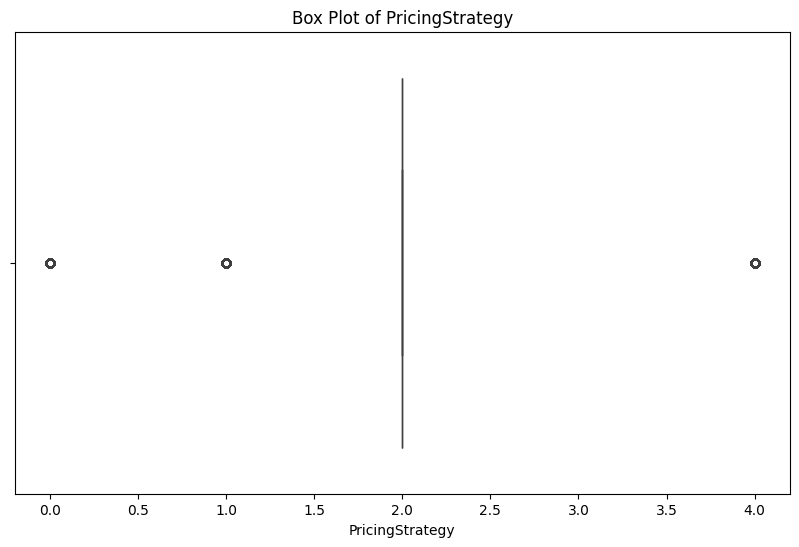

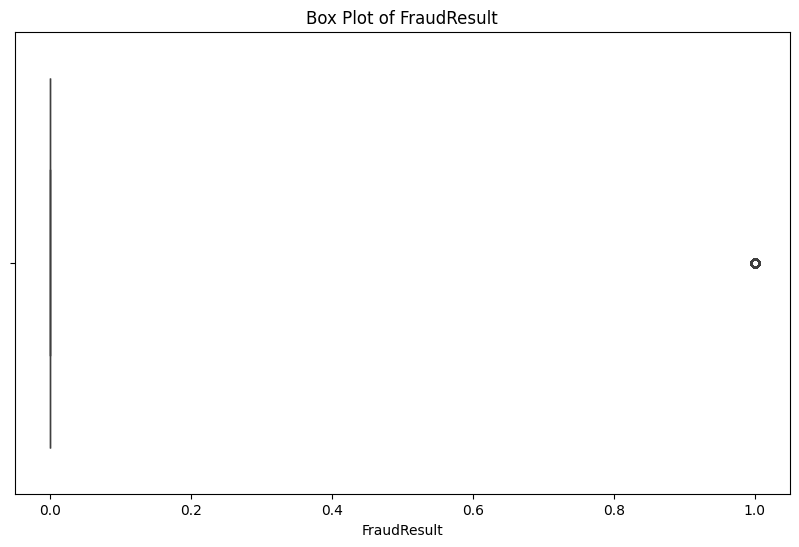

In [9]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()